### 4_1. Logistic classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [4]:
#load the files

X_train = pd.read_csv('../data/x_y_data/SMOTE/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/SMOTE/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/SMOTE/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/SMOTE/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

In [5]:
X_train.shape

(8260, 25)

### Variable Importance 

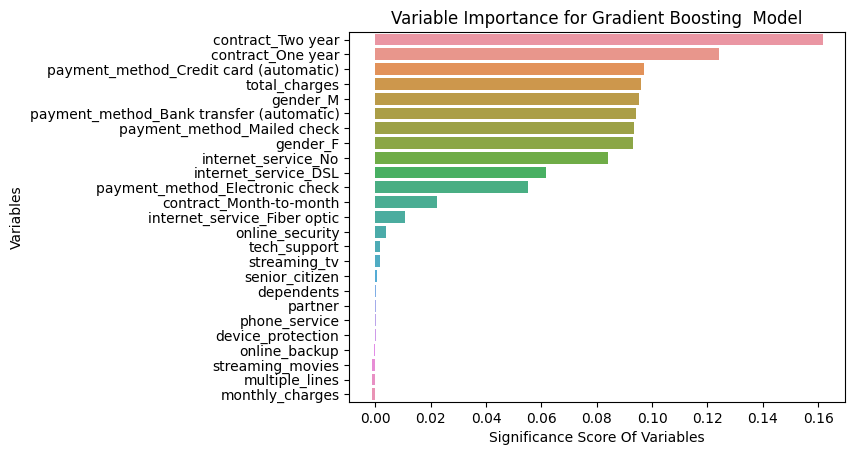

In [9]:
lg1= LogisticRegression(penalty = 'l2')

lg_tuned = lg1.fit(X_train, y_train)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(lg_tuned, X_train, y_train, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


In [10]:
#save the model
lg1.fit(X_train, y_train)

filename = "../models/smote_lg.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(lg1,file)

In [12]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df.head()

,0
contract_Two year,0.161622
contract_One year,0.124080
payment_method_Credit card (automatic),0.097264
total_charges,0.095944
gender_M,0.095109


[CV 1/5; 2/4] START penalty=l2..................................................
[CV 1/5; 2/4] END ...penalty=l2;, score=(train=nan, test=nan) total time=   0.3s
[CV 2/5; 2/4] START penalty=l2..................................................
[CV 2/5; 2/4] END ...penalty=l2;, score=(train=nan, test=nan) total time=   0.3s
[CV 3/5; 2/4] START penalty=l2..................................................
[CV 3/5; 2/4] END ...penalty=l2;, score=(train=nan, test=nan) total time=   0.3s
[CV 4/5; 1/4] START penalty=l1..................................................
[CV 4/5; 1/4] END ...penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 3/4] START penalty=elasticnet..........................................
[CV 2/5; 3/4] END penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 3/4] START penalty=elasticnet..........................................
[CV 4/5; 3/4] END penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5; 4/4] STAR

In [15]:
feature_importances_df.to_csv('../data/Significant_Score/SMOTE_LG_Significance_Score.csv', index=False)

### the classification report

In [17]:
from sklearn.metrics import confusion_matrix


y_pred = lg1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[776, 257],
       [ 90, 284]])

In [18]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

No     866
Yes    541
Name: count, dtype: int64

In [19]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
No       1033
Yes       374
Name: count, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = lg1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.753376
1,Precision,0.524954
2,Recall,0.759358
3,F1-Score,0.620765
4,Kappa,0.446915


In [25]:
metrics_df.to_csv('../data/metrics/SMOTE_lg_metrics.csv', index=False)